# Basic classification

옷, 신발, 셔츠 같은 이미지를 분류하기 위한 튜토리얼으로 tensorflow 를 훝어보기 위한 것이다. 자세한 설명은 여기서는 다루지 않는다.

In [2]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


### Import the Fashion MNIST

여기서는 [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)을 사용하며, 70,000 개의 grayscale 이미지(28 x 28 pixels)와 10개의 카테고리로 이루어진다. 

![figure1](https://tensorflow.org/images/fashion-mnist-sprite.png)
*<b>Figure 1.</b> Fashion-MNIST samples (by Zalando, MIT License).*

...

60,000 이미지로 network를 학습시키고, 10,000 이미지로 학습한 network가 분류를 얼마나 정확히 하는지를 평가할 것이다.

In [15]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

위의 load_data()로 인해, 4개의 NumPy array를 리턴한다:
- train_images와 train_labels은 training set으로, model을 학습시키는데 사용된다.
- 그 model은 test set인 test_images, test labels에 의해 테스트된다.

이미지의 label은 각각 다음의 class에 매칭이 된다:

|Label|Class|
|--|--|
0|T-shirt/top
1|Trouser
2|Pullover
3|Dress
4|Coat
5|Sandal
6|Shirt
7|Sneaker
8|Bag
9|Ankle boot

데이터셋에 class이름을 포함하고 있지 않기 때문에 이것을 담아주자

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

model을 학습하기 전, 60,000개의 이미지가 28 x 28 필셀로 나타나 있는 것을 들여다 보자

In [19]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

labels 내 각 label은 0과 9사이의 정수로 이루어져 있다.

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

test set 또한 위와 마찬가지

In [23]:
test_images.shape

(10000, 28, 28)

In [24]:
len(test_labels)

10000

### Preprocess the data

network를 학습하기 전, 데이터는 반드시 전처리(preprocess)되어야 한다. training set의 첫 이미지를 들여다 보면, pixel의 값이 0~255 사이의 값인 것을 확인할 수 있다.

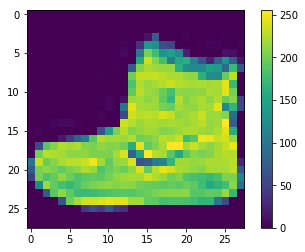

In [31]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

뉴럴넷 모델에 데이터를 넣기 전, 이러한 값들을 0~1 사이의 값으로 변환해야 한다. 그러기 위해서는 int에서 float로 바꿔야 하고 이를 255로 나누어야 한다. 

**NOTE**: 중요한 점은, traing set과 test set이 같은 방법으로 전처리 되어야 하다는 것이다.

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

처음 25개의 이미지를 각 하단에 클래스명을 함께 띄워 확인해보고, 데이터가 네트워크를 학습할 준비가 된 정확한 format인지를 확인해 보자

NameError: name 'train_lables' is not defined

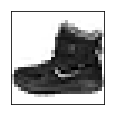

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
    

*Ongoing*

### Reference

https://www.tensorflow.org/tutorials/keras/basic_classification